In [1]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
import glob
import nltk
import re
from bs4 import BeautifulSoup

Using TensorFlow backend.


In [2]:
# Importing all the needed modules.
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import keras
from keras.layers import Embedding,Dense, Dropout, Activation, Flatten, Conv1D,Conv2D,MaxPooling1D,Concatenate, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.engine.input_layer import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.555)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
df = pd.read_excel("gcdr_kannada.xls",names = ['eng', 'kan'])
print(df.shape)
df = df.dropna()
df.head(10)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(24966, 2)


,eng,kan
0,Firefox,"ಫೈರ್ ಫಾಕ್ಸ್,ಫಾಯರಫಾಕ್ಸ"
1,Mozilla Firefox,ಮೋಝಿಲಾ ಫಾಯರಫಾಕ್ಸ
2,"Firefox Start, a fast home page with built-in ...","ಫಾಯರಫಾಕ್ಸ ಸುರು, ಜೋರಾದ ಮನೆ ಪುಟ, ಬಿಲ್ಟಿನ್ ಶೋಧವುಳ..."
3,Import your home page from %S,%S ದಿಂದ ನಿಮ್ಮ ಹೋಮ್ ಪೇಜನ್ನು ಆಯಾತ ಮಾಡಬಹುದು
4,Home Page Selection,ಹೋಮ್ ಪೇಜ್ ಆಯ್ಕೆ
5,Please select the home page you wish to use,ನೀವು ಉಪಯೋಗಿಸಬೇಕಿರುವ ಹೋಮ್ ಪೇಜನ್ನು ಆರಿಸಿಕೊಳ್ಳಿ
6,Gort! Klaatu barada nikto!,Gort! Klaatu barada nikto
7,Welcome Humans!,ಸುಸ್ವಾಗತಃ ಮಾನವರೇ !
8,Please do not press this button again,ಈ ಬಟನ್ ಮತ್ತೆ ಒತ್ತಬೇಡಿ
9,About &brandFullName,"brandFullName; ಬಗ್ಗೆ,ಬಗ್ಗೆ &brandFullName,bran..."


In [4]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
df.eng = df.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df.kan = df.kan.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [5]:
eng = list(df.eng)
kan = list(df.kan)

## Pre-processing

In [6]:
text = []
for each in eng:
    each = re.sub(r'[0-9]',"",each)
    soup = BeautifulSoup(each)
    txt = soup.get_text()
    txt = txt.lower()
    txt = re.sub(r'[\n\t\-\\\/\|]'," ",txt)
    txt = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,$%^&*'/+\[\]_]+", "", txt)
    txt = re.sub(r" +", " ", txt)
    text.append(txt)
    
text[0:3],len(text)

(['firefox',
  'mozilla firefox',
  'firefox start a fast home page with builtin search'],
 24963)

In [7]:
kan_text = []
for each in kan:
    txt = re.sub(r'[0-9]',"",each)
    txt = re.sub(r'[೧೨೩೪೫೬೭೮೯]',"",txt)
    txt = re.sub(r'[A-Za-z]',"",txt)
    soup = BeautifulSoup(txt)
    txt = soup.get_text()
    txt = txt.lower()
    txt = re.sub(r'[\n\t\-\\\/\|]'," ",txt)
    txt = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?$%^&*'/+\[\]_]+", "", txt)
    txt = re.sub(r",", " ", txt)
    txt = re.sub(r" +", " ", txt)
    kan_text.append(txt)
    
    
kan_text[0:3],len(kan_text)

(['ಫೈರ್ ಫಾಕ್ಸ್ಫಾಯರಫಾಕ್ಸ',
  'ಮೋಝಿಲಾ ಫಾಯರಫಾಕ್ಸ',
  'ಫಾಯರಫಾಕ್ಸ ಸುರು ಜೋರಾದ ಮನೆ ಪುಟ ಬಿಲ್ಟಿನ್ ಶೋಧವುಳ್ಳದ್ದು'],
 24963)

In [8]:
nt = ''

final_kan = []
final_eng = []

for w in zip(text,kan_text):
    if w[0] != nt and w[1] != nt:
        final_eng.append(w[0])
        final_kan.append("START_ "+w[1]+" _END")

In [9]:
(final_eng[0:5],final_kan[0:5])

(['firefox',
  'mozilla firefox',
  'firefox start a fast home page with builtin search',
  'import your home page from s',
  'home page selection'],
 ['START_ ಫೈರ್ ಫಾಕ್ಸ್ಫಾಯರಫಾಕ್ಸ _END',
  'START_ ಮೋಝಿಲಾ ಫಾಯರಫಾಕ್ಸ _END',
  'START_ ಫಾಯರಫಾಕ್ಸ ಸುರು ಜೋರಾದ ಮನೆ ಪುಟ ಬಿಲ್ಟಿನ್ ಶೋಧವುಳ್ಳದ್ದು _END',
  'START_ ದಿಂದ ನಿಮ್ಮ ಹೋಮ್ ಪೇಜನ್ನು ಆಯಾತ ಮಾಡಬಹುದು _END',
  'START_ ಹೋಮ್ ಪೇಜ್ ಆಯ್ಕೆ _END'])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_eng, final_kan, test_size=0.15)
print(len(X_train),len(X_test),len(y_train),len(y_test))

20068 3542 20068 3542


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN_ENG = 50


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
dictionary = tokenizer.word_index

word2idx = {}
idx2word = {}
for k, v in dictionary.items(): 
    word2idx[k] = v
    idx2word[v] = k

input_data_train = pad_sequences(seq_train, maxlen=MAX_LEN_ENG, dtype='int32', padding='post', truncating='post')
input_data_test = pad_sequences(seq_test, maxlen=MAX_LEN_ENG, dtype='int32', padding='post', truncating='post')

In [13]:
MAX_LEN_KAN = 50

tokenizer = Tokenizer()
tokenizer.fit_on_texts(y_train)
seq_train_kan = tokenizer.texts_to_sequences(y_train)
seq_test_kan = tokenizer.texts_to_sequences(y_test)
dictionary_kan = tokenizer.word_index

word2idx_kan = {}
idx2word_kan = {}
for k, v in dictionary_kan.items(): 
    word2idx_kan[k] = v
    idx2word_kan[v] = k

out_data_train = pad_sequences(seq_train_kan, maxlen=MAX_LEN_KAN, dtype='int32', padding='post', truncating='post')
out_data_test = pad_sequences(seq_test_kan, maxlen=MAX_LEN_KAN, dtype='int32', padding='post', truncating='post')

In [14]:
len(word2idx_kan)

21273

In [15]:
enc_tokens = len(word2idx); dec_tokens = len(word2idx_kan)+1
enc_tokens, dec_tokens

(8387, 21274)

In [16]:
def generate_batch(X = input_data_train, y = out_data_train, batch_size = 32):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, MAX_LEN_ENG),dtype='float32')
            decoder_input_data = np.zeros((batch_size, MAX_LEN_KAN),dtype='float32')
            decoder_target_data = np.zeros((batch_size, MAX_LEN_KAN, dec_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                encoder_input_data[i] = input_text # encoder input seq
                decoder_input_data[i] = target_text # decoder input seq
                decoder_target_data[i][0:MAX_LEN_KAN-1] = tf.keras.utils.to_categorical(target_text[1:],dtype='float32',num_classes = dec_tokens)
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [17]:
for i,j in generate_batch():
    print(i[0].shape,i[1].shape,j.shape)
    break

(32, 50) (32, 50) (32, 50, 21274)


## Model

In [20]:
latent_dim = 50

In [65]:
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(enc_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]


In [66]:
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(dec_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(dec_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [67]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='seq2seq_plot.png', show_shapes=True, show_layer_names=True)

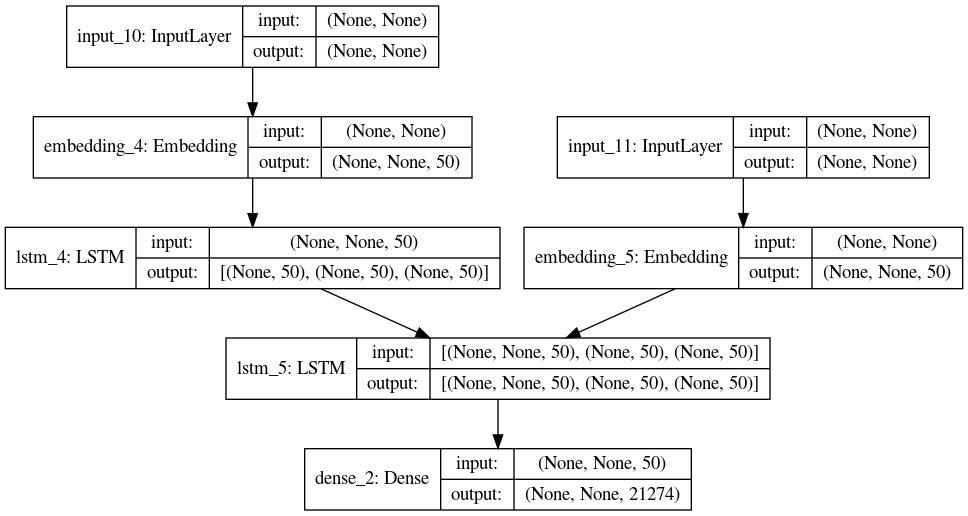

In [68]:
from IPython.display import Image
Image(retina=True, filename='seq2seq_plot.png')

In [69]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 50)     419350      input_10[0][0]                   
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 50)     1063700     input_11[0][0]                   
__________________________________________________________________________________________________
lstm_4 (LS

In [70]:
model.load_weights("weights_engtokan.h5")

In [27]:
filepath="weights_engtokan.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [28]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
batch_size = 32
history = model.fit_generator(generator = generate_batch(input_data_train, out_data_train, batch_size = batch_size),
                    steps_per_epoch = len(input_data_train)//batch_size,
                    epochs= 100,
                    validation_data = generate_batch(input_data_test, out_data_test, batch_size = batch_size),
                    validation_steps = len(input_data_test)//batch_size,callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/100
627/627 [==============================] - 390s 622ms/step - loss: 6.6794 - acc: 0.2613 - val_loss: 5.5477 - val_acc: 0.3391

Epoch 00001: val_acc improved from -inf to 0.33913, saving model to weights_engtokan.h5
Epoch 2/100
627/627 [==============================] - 375s 599ms/step - loss: 5.9917 - acc: 0.3183 - val_loss: 5.4748 - val_acc: 0.3351

Epoch 00002: val_acc did not improve from 0.33913
Epoch 3/100
627/627 [==============================] - 384s 612ms/step - loss: 5.8350 - acc: 0.3203 - val_loss: 5.4569 - val_acc: 0.3363

Epoch 00003: val_acc did not improve from 0.33913
Epoch 4/100
627/627 [==============================] - 376s 600ms/step - loss: 5.7293 - acc: 0.3235 - val_loss: 5.4140 - val_acc: 0.3573

Epoch 00004: val_acc improved from 0.33913 to 0.35734, saving model to weights_engtokan.h5
Epoch 5/100
627/627 [======================

627/627 [==============================] - 266s 425ms/step - loss: 5.1963 - acc: 0.4286 - val_loss: 5.1174 - val_acc: 0.4080

Epoch 00036: val_acc improved from 0.40667 to 0.40800, saving model to weights_engtokan.h5
Epoch 37/100
627/627 [==============================] - 268s 427ms/step - loss: 5.1844 - acc: 0.4310 - val_loss: 5.1105 - val_acc: 0.4069

Epoch 00037: val_acc did not improve from 0.40800
Epoch 38/100
627/627 [==============================] - 270s 430ms/step - loss: 5.1725 - acc: 0.4332 - val_loss: 5.1079 - val_acc: 0.4097

Epoch 00038: val_acc improved from 0.40800 to 0.40973, saving model to weights_engtokan.h5
Epoch 39/100
627/627 [==============================] - 272s 434ms/step - loss: 5.1590 - acc: 0.4351 - val_loss: 5.1004 - val_acc: 0.4109

Epoch 00039: val_acc improved from 0.40973 to 0.41086, saving model to weights_engtokan.h5
Epoch 40/100
627/627 [==============================] - 270s 431ms/step - loss: 5.1460 - acc: 0.4369 - val_loss: 5.0942 - val_acc: 0.4


Epoch 00076: val_acc did not improve from 0.41854
Epoch 77/100
627/627 [==============================] - 371s 592ms/step - loss: 4.8080 - acc: 0.4850 - val_loss: 5.1059 - val_acc: 0.4145

Epoch 00077: val_acc did not improve from 0.41854
Epoch 78/100
627/627 [==============================] - 370s 590ms/step - loss: 4.8031 - acc: 0.4857 - val_loss: 5.1154 - val_acc: 0.4129

Epoch 00078: val_acc did not improve from 0.41854
Epoch 79/100
627/627 [==============================] - 376s 600ms/step - loss: 4.7985 - acc: 0.4863 - val_loss: 5.1148 - val_acc: 0.4143

Epoch 00079: val_acc did not improve from 0.41854
Epoch 80/100
627/627 [==============================] - 365s 583ms/step - loss: 4.7933 - acc: 0.4871 - val_loss: 5.1181 - val_acc: 0.4144

Epoch 00080: val_acc did not improve from 0.41854
Epoch 81/100
627/627 [==============================] - 362s 578ms/step - loss: 4.7891 - acc: 0.4878 - val_loss: 5.1084 - val_acc: 0.4148

Epoch 00081: val_acc did not improve from 0.41854
Epoc

In [29]:
model.load_weights('weights_engtokan.h5')

In [71]:
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(None,))
decoder_state_input_c = Input(shape=(None,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

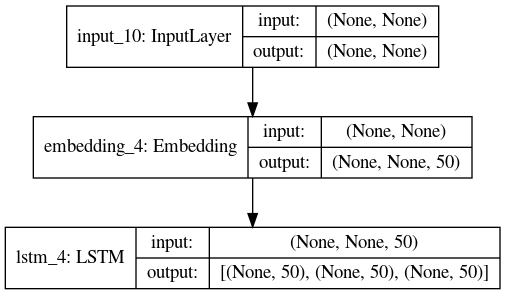

In [72]:
plot_model(encoder_model, to_file='encoder_model.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='encoder_model.png')

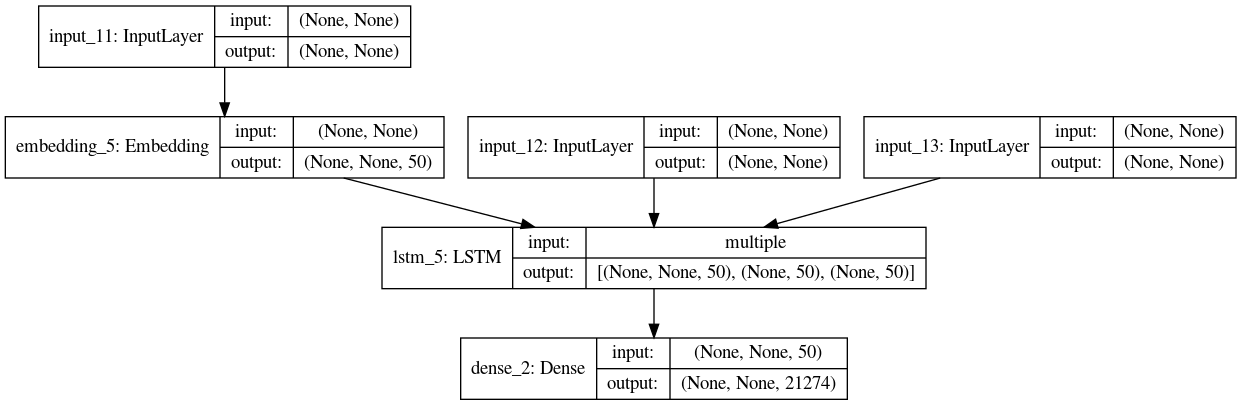

In [73]:
plot_model(decoder_model, to_file='decoder_model.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='decoder_model.png')

In [89]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = word2idx_kan['start']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         print(sampled_token_index)
        sampled_char = idx2word_kan[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

## Train data prediction

In [110]:

train_gen = generate_batch(input_data_train, out_data_train, batch_size = 1)
k=-1

In [111]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1])
print('Actual kannada Translation:', y_train[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['filters successfully imported from s']
Actual kannada Translation:  ನಿಂದ ಅಂಚೆಯನ್ನು ಯಶಸ್ವಿಯಾಗಿ ಆಮದು ಮಾಡಿಕೊಳ್ಳಲಾಗಿದೆ 
Predicted kannada Translation:  ಯಶಸ್ವಿಯಾಗಿ ಆಮದು ಯಶಸ್ವಿಯಾಗಿ ಆಮದು ಬಯಸುವಿರಾ end      


In [112]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1])
print('Actual kannada Translation:', y_train[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence[:-4])


Input English sentence: ['error updating the current record']
Actual kannada Translation:  ಪ್ರಸ್ತುತ ದಾಖಲೆಯನ್ನು ಪರಿಷ್ಕರಿಸುವಾಗ ದೋಷ 
Predicted kannada Translation:  ಪ್ರಸ್ತುತ ಈಗ ಉಳಿಸು end                         


In [113]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1])
print('Actual kannada Translation:', y_train[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence[:-4])


Input English sentence: ['email recipient certificate']
Actual kannada Translation:  ವಿಅಂಚೆ ಗ್ರಾಹಕ ಪ್ರಮಾಣೀಕರಣ ಪತ್ರ 
Predicted kannada Translation:  ವಿಅಂಚೆ ಪ್ರಮಾಣಪತ್ರ ವಿಅಂಚೆ ಎಂದು end             


In [114]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1])
print('Actual kannada Translation:', y_train[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence[:-4])


Input English sentence: ['all excel documents contained in the following directory will be imported']
Actual kannada Translation:  ಈ ಕೆಳಗಿನ ನಿರ್ದೇಶಿಕೆಯಲ್ಲಿರುವ ಎಲ್ಲಾ ಎಕ್ಸೆಲ್ ದಸ್ತಾವೇಜುಗಳನ್ನೂ ಆಮದು ಮಾಡಿಕೊಳ್ಳಲಾಗುತ್ತದೆ 
Predicted kannada Translation:  ಈ ಕೆಳಗಿನ ನಿರ್ದೇಶಿಕೆಯಲ್ಲಿರುವ ಎಲ್ಲಾ ಆಮದು ಎಲ್ಲಾ ಆಮದು


## Test data prediction

In [116]:

train_gen = generate_batch(input_data_test, out_data_test, batch_size = 1)
k=-1

In [126]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1])
print('Actual kannada Translation:', y_test[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['close the attachment manager when all attachments are complete']
Actual kannada Translation:  ಎಲ್ಲಾ ಲಗತ್ತಿಕೆಗಳೂ ಪೂರ್ತಿಯಾದಾಗ ಲಗತ್ತಿಕೆ ವ್ಯವಸ್ಥಾಪಕ ಕಿಟಕಿ ಮುಚ್ಚು 
Predicted kannada Translation:  ಎಲ್ಲ ಎಲ್ಲ ಸಂದೇಶಗಳನ್ನು ರದ್ದು ಮಾಡು end              


In [134]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1])
print('Actual kannada Translation:', y_test[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['add the following microsummary generatornnsource s']
Actual kannada Translation:  ಕೆಳಗಿನ ಮೈಕ್ರೋ ಸಮರಿ ಜನರೇಟರ್ ಸೇರಿಸಲೋ ಮೂಲ  
Predicted kannada Translation:  ಕೆಳಗಿನ ಕೆಳಗಿನ ಸಾಲಿನಲ್ಲಿ ಭಾಷಾಂತರಿಸ ಬೇಡಿ ಕೆಳಗಿನ ಸಾಲಿನಲ್ಲಿ


In [135]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1])
print('Actual kannada Translation:', y_test[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['creating database files']
Actual kannada Translation:  ದತ್ತಸಂಚಯ ಕಡತಗಳನ್ನು ರಚಿಸುತ್ತಿದೆ 
Predicted kannada Translation:  ದತ್ತಸಂಚಯ ಕಡತಗಳನ್ನು ಕಡತಗಳನ್ನು end                  


In [136]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1])
print('Actual kannada Translation:', y_test[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['brandshortname thinks this message might be an email scam']
Actual kannada Translation:  ಈ ಸಂದೇಶ ವಿಅಂಚೆ ಮೋಸದ ಜಾಲ ಎಂದು ಅಭಿಪ್ರಾಯ ಪಡುತ್ತದೆ ಈ ಸಂದೇಶವನ್ನು ವಿಅಂಚೆಯ ಮೋಸಗಾರಿಕೆ ಎಂಬುದಾಗಿ ಭಾವಿಸುತ್ತದೆ 
Predicted kannada Translation:  ಈ ಸಂದೇಶ ನಮೂದಿಸಿ end                               


In [142]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1])
print('Actual kannada Translation:', y_test[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['installs german support in productname productversion']
Actual kannada Translation:  ಇದರಲ್ಲಿ ಜರ್ಮನ್ ಬೆಂಬಲವನ್ನು ಅನುಸ್ಥಾಪಿಸುತ್ತದೆ  
Predicted kannada Translation:  ಇದರಲ್ಲಿ ನಿಮ್ಮ ಇದರಲ್ಲಿ ಆಯ್ಕೆಮಾಡು end               


In [143]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1])
print('Actual kannada Translation:', y_test[k:k+1][0][6:-4])
print('Predicted kannada Translation:', decoded_sentence)


Input English sentence: ['select file for floating frame']
Actual kannada Translation:  ಚರ ಚೌಕಟ್ಟಿಗೆ ಕಡತ ಆಯ್ಕೆ ಮಾಡಿ 
Predicted kannada Translation:  ಕಡತ ಆಯ್ಕೆಮಾಡು end                                 
